In [2]:
import sqlite3
import pandas as ppd
conn = sqlite3.connect('lahman2014.sqlite')

In [58]:
#Part 1: Wrangling
#Problem1:
c = conn.cursor()
salary_query = "SELECT yearID, teamID, sum(salary) as total_payroll FROM Salaries WHERE yearID >= 1990 GROUP BY teamID, yearID ORDER BY teamID "
team_salary = pd.read_sql(salary_query, conn)
win_query = "SELECT yearID, teamID, W as Win, G as Game, CAST(W as float)*100/G as Win_percentage, franchID FROM Teams WHERE  yearID >= 1990 GROUP BY teamID, yearID ORDER BY teamID"
team_win = pd.read_sql(win_query, conn)
join_table = team_salary.merge(team_win, how = "inner", left_on = ["yearID", "teamID"], right_on = ["yearID", "teamID"])
join_table

,yearID,teamID,total_payroll,Win,Game,Win_percentage,franchID
0,1997,ANA,31135472.0,84,162,51.851852,ANA
1,1998,ANA,41281000.0,85,162,52.469136,ANA
2,1999,ANA,55388166.0,70,162,43.209877,ANA
3,2000,ANA,51464167.0,82,162,50.617284,ANA
4,2001,ANA,47535167.0,75,162,46.296296,ANA
...,...,...,...,...,...,...,...
723,2010,WAS,61400000.0,69,162,42.592593,WSN
724,2011,WAS,63856928.0,80,161,49.689441,WSN
725,2012,WAS,80855143.0,98,162,60.493827,WSN
726,2013,WAS,113703270.0,86,162,53.086420,WSN


In [176]:
#Problem 2
import matplotlib.pyplot as plt
import numpy as np

#get the list of teams
teams = np.unique(join_table.iloc[:,1].values)


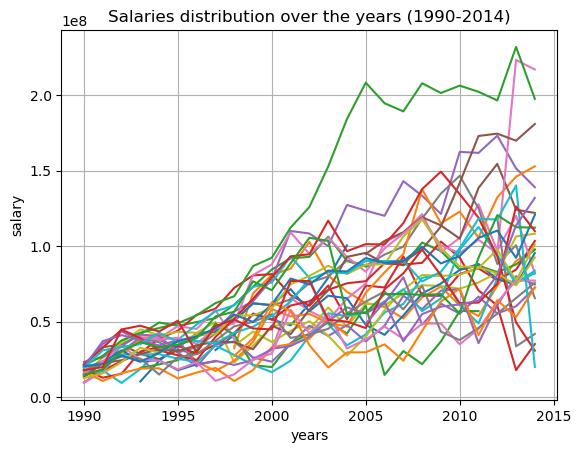

In [60]:

fig, ax = plt.subplots()
for t in teams: 
    plot_data = join_table[join_table['teamID'] == t] #get the data from the current team
    plt.plot(plot_data['yearID'], plot_data['total_payroll'].fillna(value = 0))

ax.set(xlabel = 'years', ylabel = 'salary', title = 'Salaries distribution over the years (1990-2014)')
ax.grid()

plt.show()

Question 1:
In general, the variance and mean increase over the time. The tendency and spread also increase over the team. 

<function matplotlib.pyplot.show(close=None, block=None)>

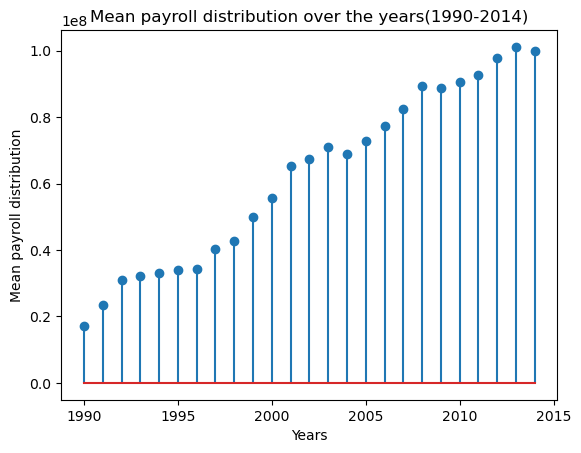

In [143]:
#Problem 3:
data = join_table[['yearID', 'total_payroll']]
mean = data.groupby('yearID').mean()

plt.stem(mean.index, mean['total_payroll'])
plt.title("Mean payroll distribution over the years(1990-2014)")
plt.xlabel("Years")
plt.ylabel("Mean payroll distribution")
plt.show


In [145]:
#Problem 4:


In [149]:
years = np.arange(1990, 2015)
time_table = pd.DataFrame(columns = ['yearID'], data = years)

#merge the new dataframe to the original dataframe to create a new dataframe order by year
frame_table = time_table.merge(join_table[['yearID', 'teamID', 'total_payroll', 'Win', 'Game', 'Win_percentage']], how = 'left', left_on=['yearID'], right_on = ['yearID'])
#adding new columns of time frames
frames = ['1990-1994', '1995-1999','2000-2004', '2005-2009','2010-2014']
frame_table['time_frames'] = pd.cut(frame_table['yearID'], right = False, bins = 5, labels = frames)
frame_table

,yearID,teamID,total_payroll,Win,Game,Win_percentage,time_frames
0,1990,ATL,14555501.0,65,162,40.123457,1990-1994
1,1990,BAL,9680084.0,76,161,47.204969,1990-1994
2,1990,BOS,20558333.0,88,162,54.320988,1990-1994
3,1990,CAL,21720000.0,80,162,49.382716,1990-1994
4,1990,CHA,9491500.0,94,162,58.024691,1990-1994
...,...,...,...,...,...,...,...
723,2014,SLN,120693000.0,90,162,55.555556,2010-2014
724,2014,TBA,72689100.0,77,162,47.530864,2010-2014
725,2014,TEX,112255059.0,67,162,41.358025,2010-2014
726,2014,TOR,109920100.0,83,162,51.234568,2010-2014


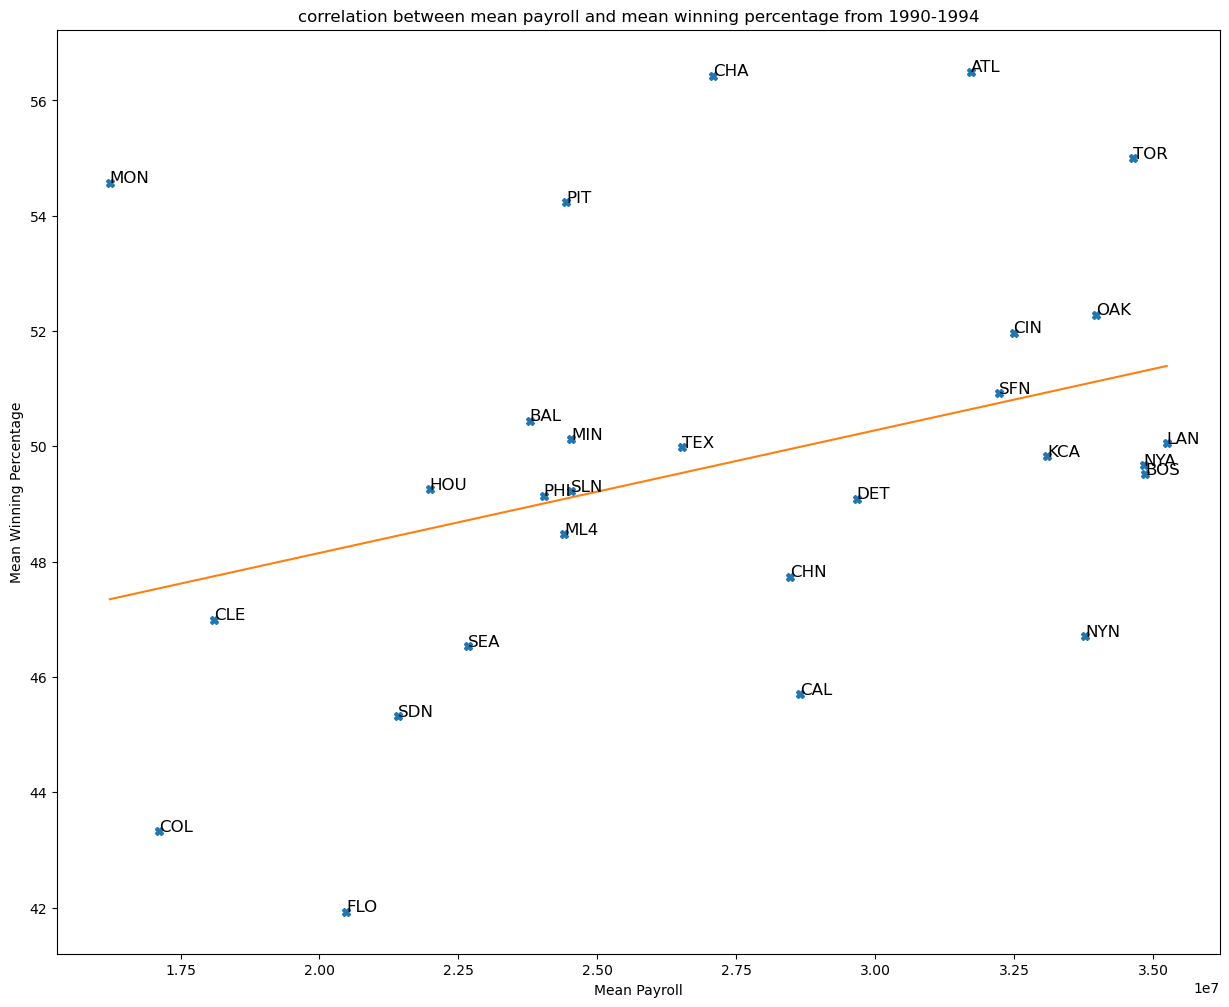

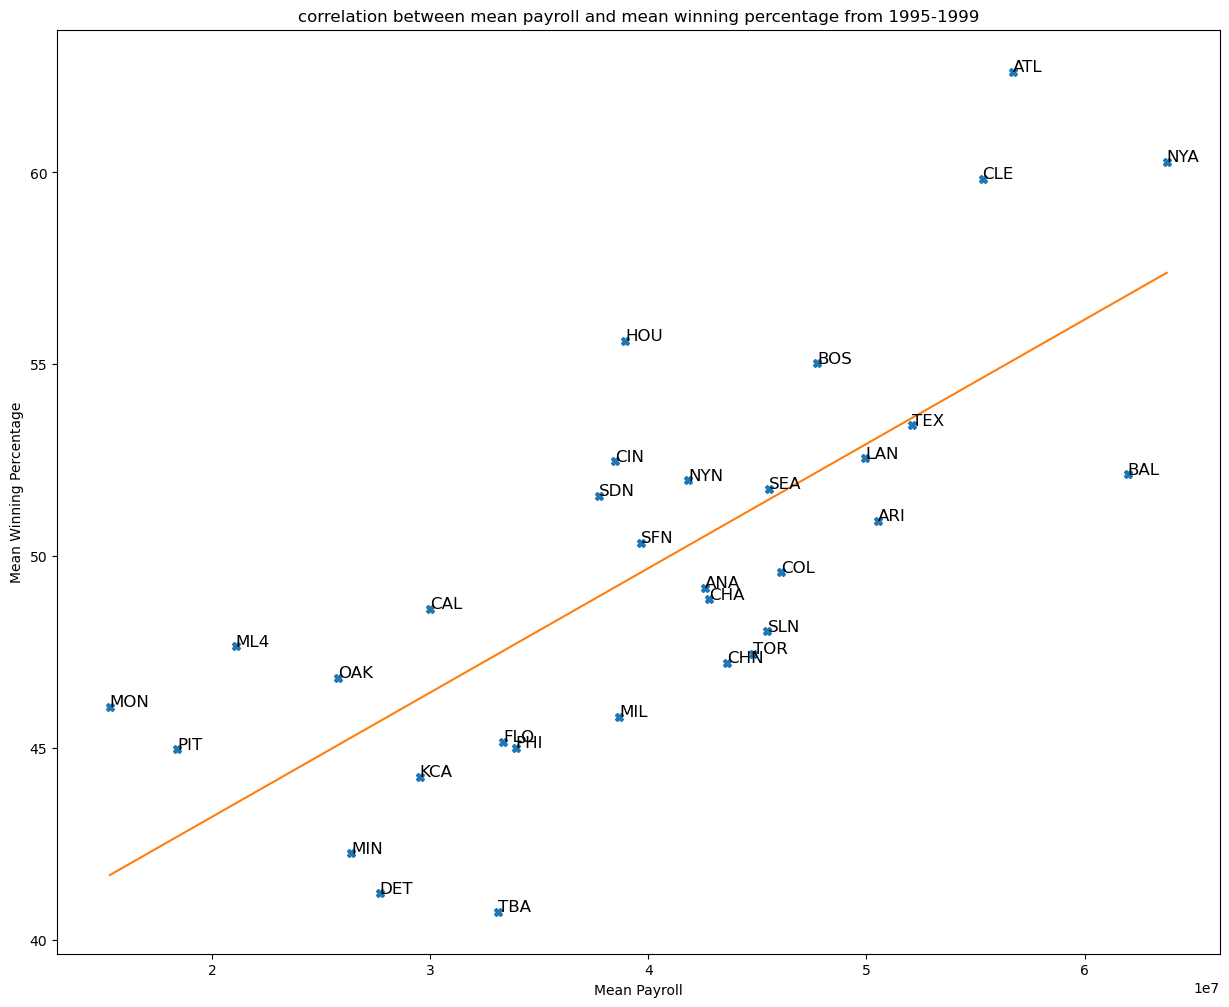

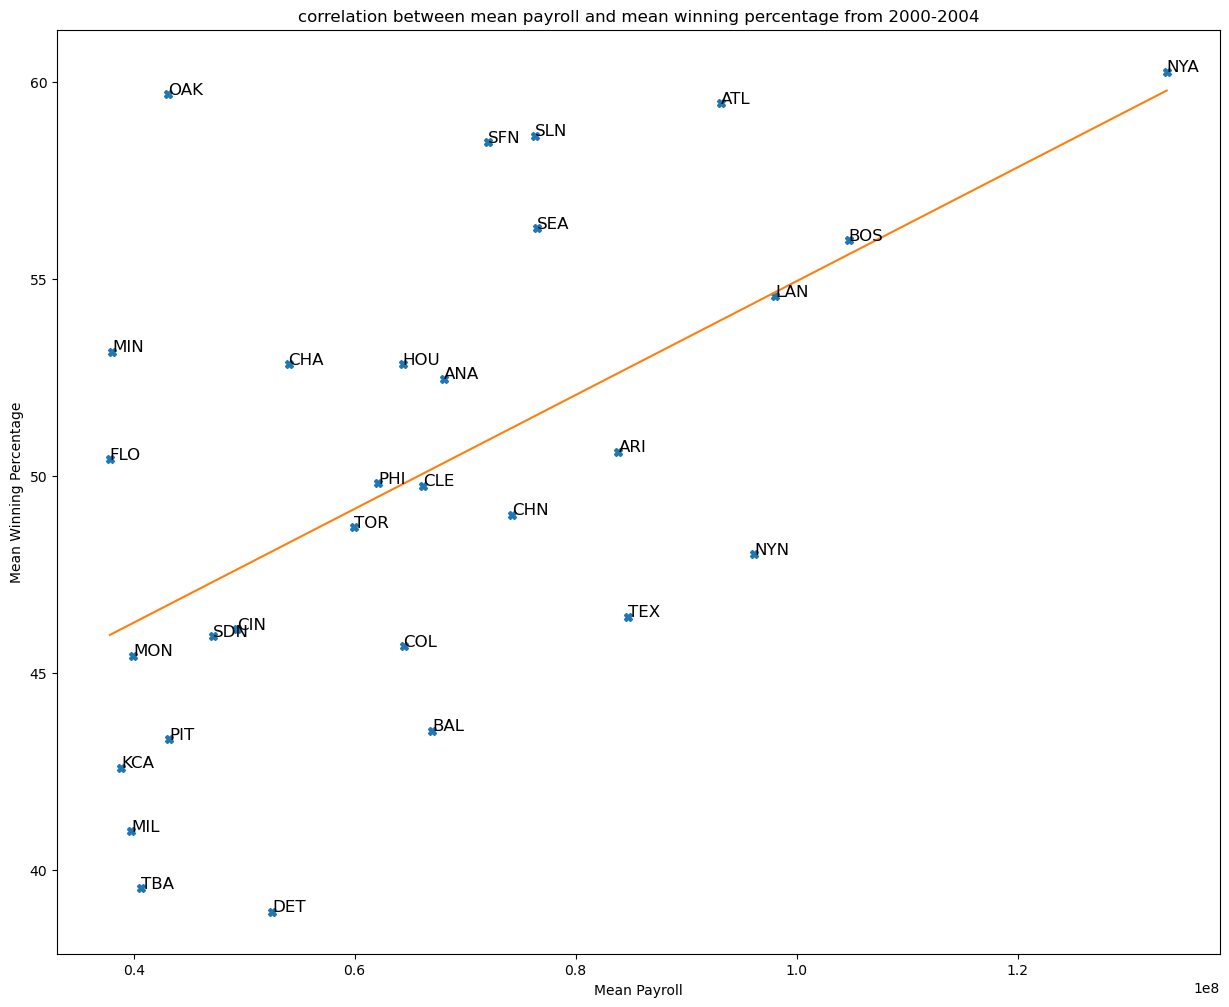

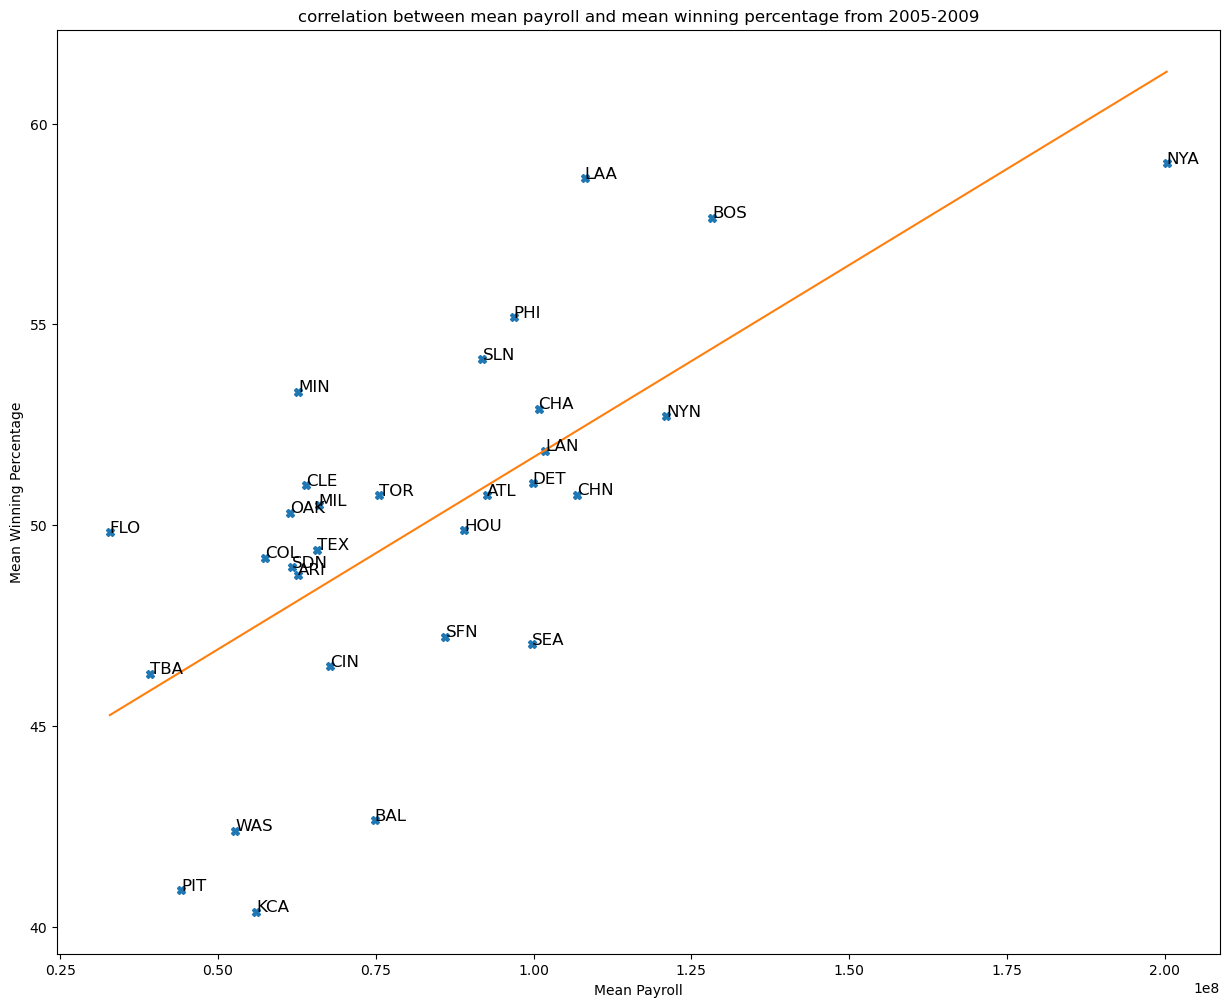

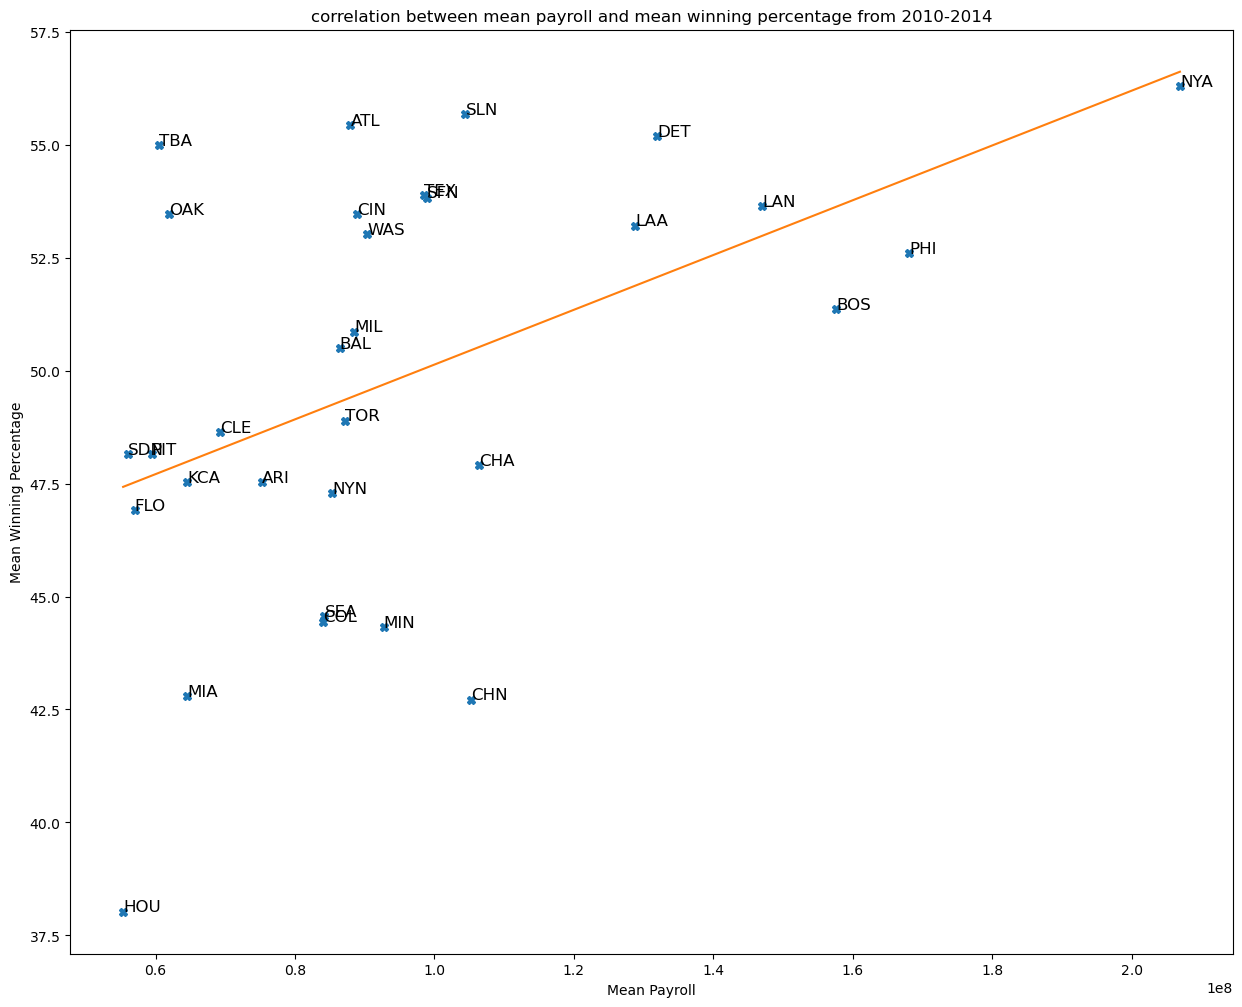

In [150]:
for i in frames:
    data = frame_table[frame_table['time_frames'] == i]
    #get the ave winning percentage in this time range for every team
    ave_winper = (data.groupby(['teamID']))['Win_percentage'].mean()
    ave_winper = ave_winper.to_frame()# convert to a dataframe
    #get the ave payrolls in this time range for every team
    ave_payroll = (data.groupby(['teamID']))['total_payroll'].mean()
    ave_payroll = ave_payroll.to_frame()

    #merge 2 dataframe
    total_ave = ave_payroll.merge(ave_winper, how = 'inner', left_on = ['teamID'], right_on=['teamID'])
    total_ave['teamID']= total_ave.index
    total_ave.columns=['ave_payrolls', 'ave_win_percentage','teamID']
    
   

 #plot 
    x_ax = total_ave['ave_payrolls'].values
    y_ax = total_ave['ave_win_percentage'].values
    lin_regression = np.poly1d(np.polyfit(x = x_ax, y = y_ax, deg = 1))
    horizontal = np.linspace(x_ax.min(), x_ax.max(), 100)
    vertical = lin_regression(horizontal)

    plt.figure(figsize  = (15,12))
    plt.plot(x_ax, y_ax, 'X', horizontal, vertical)
    
    #label the teams
    for j, t in enumerate(total_ave['teamID']):
        plt.annotate(t, (x_ax[j], y_ax[j]), size = 12)

    plt.title("correlation between mean payroll and mean winning percentage from "+i)
    plt.xlabel("Mean Payroll")
    plt.ylabel("Mean Winning Percentage")
    plt.show()

Question 2:
In general, the mean payrolls increased across these periods. In 2010-2014 period, TBA, OAK, ATL standed out as being particularly good at paying efficiency. NYA tended to pay more to win but their paying efficiency was not that good. HOU seemed to not paying enough to win. OAK paid a lot during 1990-1994 period and paid less during 1995-2000. In 2000, 2004, OAK'paying efficiency was really good and it went down during 2005-2010. IT then fot back during 2010-2014

In [175]:
#Part 3:
#Problem 5:
std_payroll = (join_table[['yearID', 'total_payroll']]).groupby('yearID').std()

ave_payroll =(join_table[['yearID','total_payroll']]).groupby('yearID').mean()

payroll_stats = ave_payroll.merge(std_payroll, how = 'inner', left_on = ['yearID'], right_on = ['yearID'])
payroll_stats['yearID'] = payroll_stats.index
payroll_stats.columns = ['mean_payroll', 'payroll_std','yearID']


In [153]:
#get the needed columns to calculate the standardized payroll
stand_payroll = frame_table[['yearID', 'teamID', 'total_payroll', 'time_frames']].copy()
stand_payroll['std_payroll'] = 0.0

#iterate through both tables to calculate

for i, r1 in stand_payroll.iterrows():
    for j, r2 in payroll_stats.iterrows():
        if (r1['yearID'] == r2['yearID']):
            #calculate
            m = payroll_stats['mean_payroll'][j]
            stand = payroll_stats['payroll_std'][j]
            stand_payroll['std_payroll'][i] = (stand_payroll['total_payroll'][i] - m)/stand

stand_payroll = stand_payroll[['yearID','teamID', 'total_payroll','std_payroll','time_frames']]

stand_payroll

/tmp/ipykernel_285/590468082.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stand_payroll['std_payroll'][i] = (stand_payroll['total_payroll'][i] - m)/stand


,yearID,teamID,total_payroll,std_payroll,time_frames
0,1990,ATL,14555501.0,-0.667275,1990-1994
1,1990,BAL,9680084.0,-1.959861,1990-1994
2,1990,BOS,20558333.0,0.924213,1990-1994
3,1990,CAL,21720000.0,1.232198,1990-1994
4,1990,CHA,9491500.0,-2.009859,1990-1994
...,...,...,...,...,...
723,2014,SLN,120693000.0,0.457126,2010-2014
724,2014,TBA,72689100.0,-0.593171,2010-2014
725,2014,TEX,112255059.0,0.272509,2010-2014
726,2014,TOR,109920100.0,0.221422,2010-2014


In [157]:
#Problem 6:


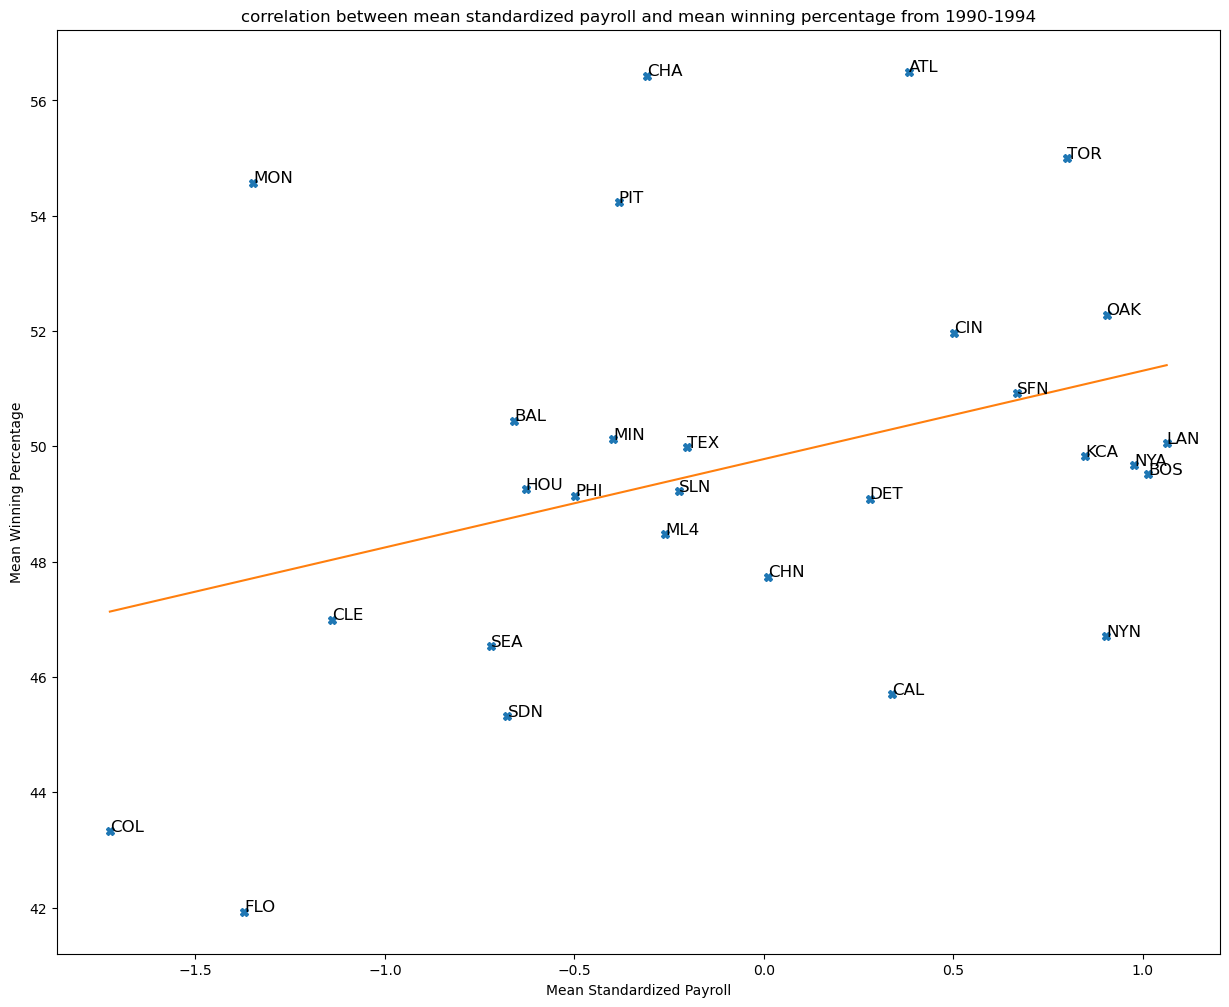

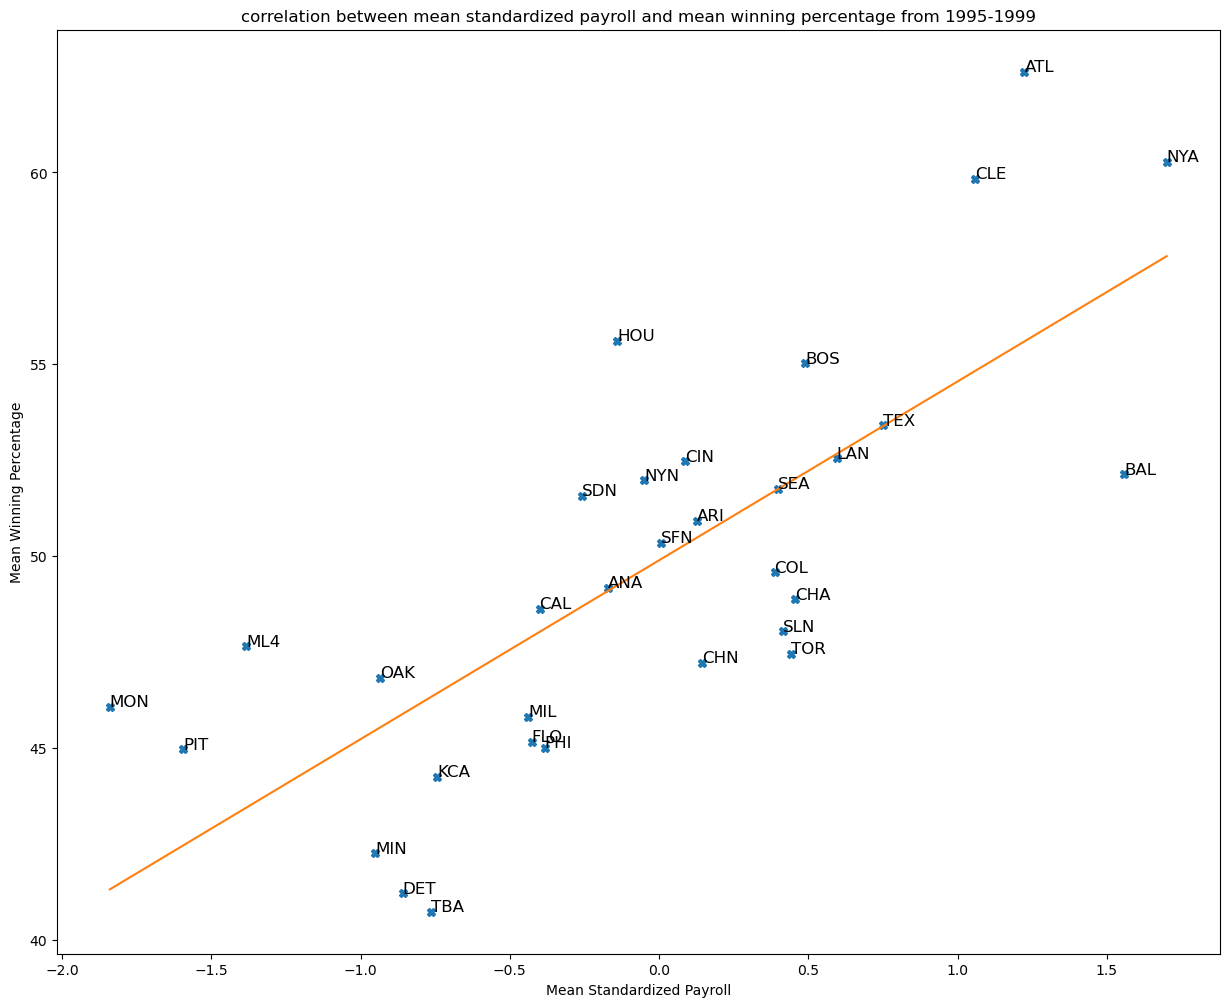

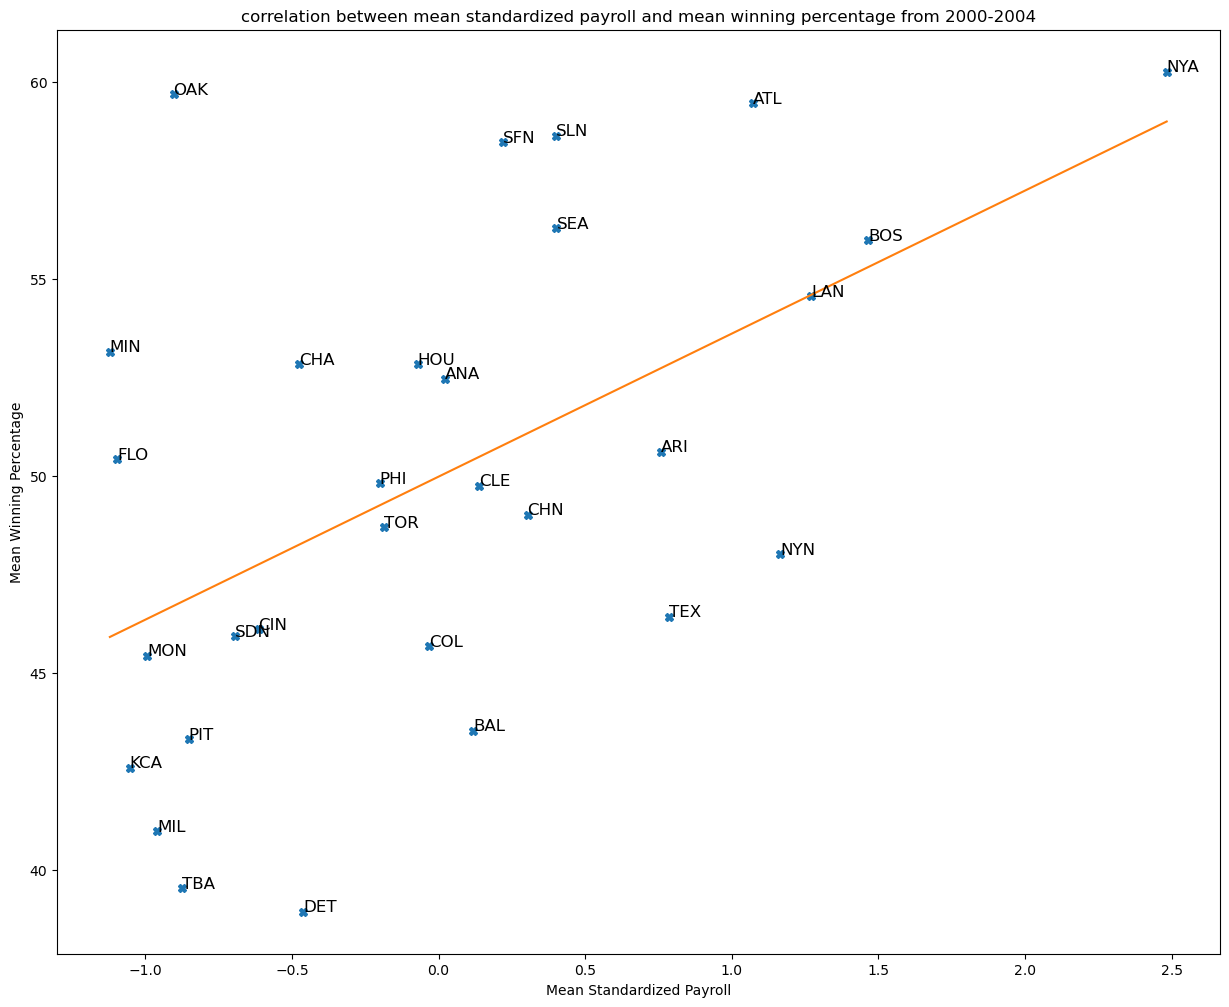

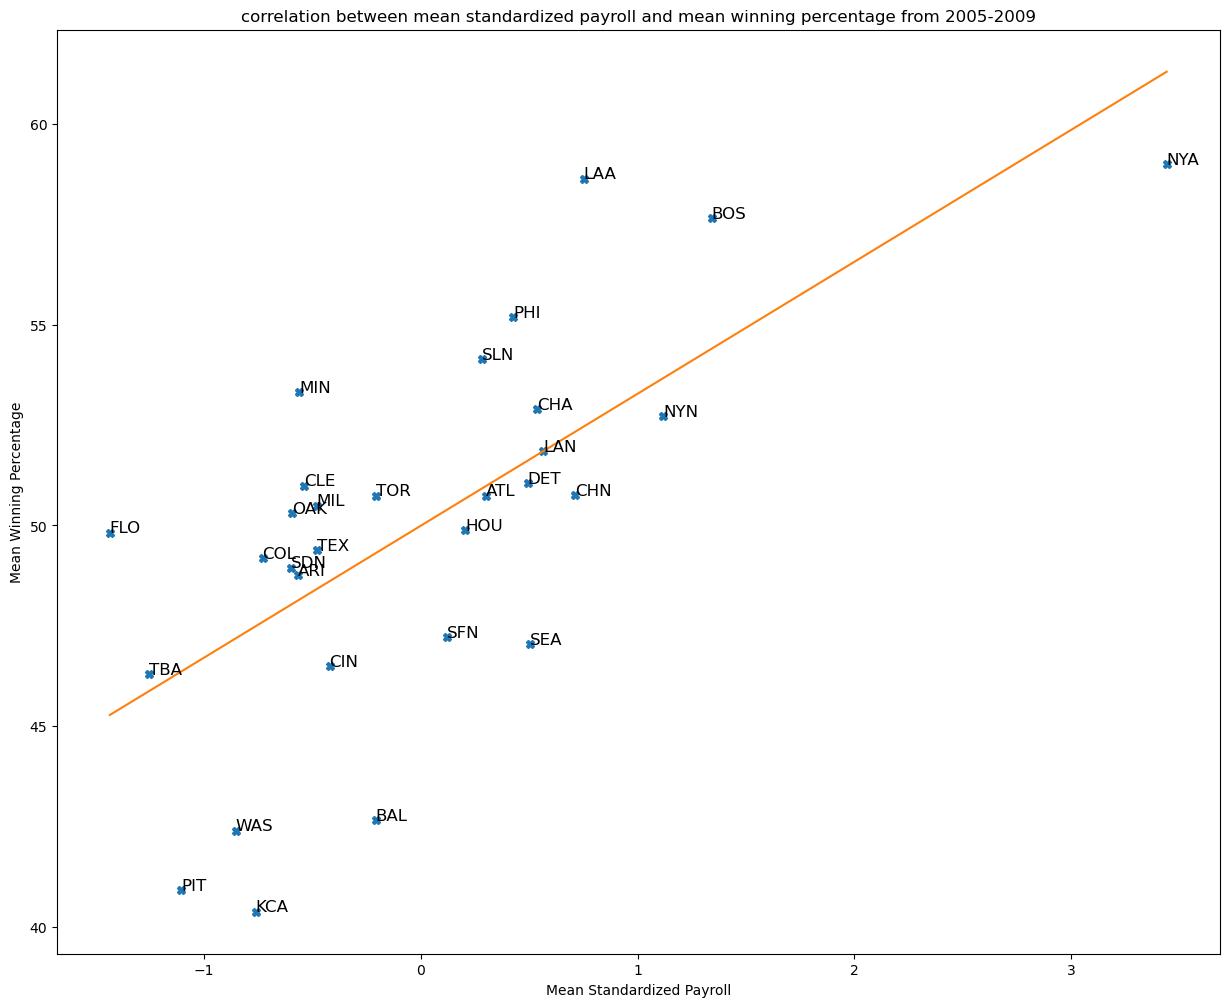

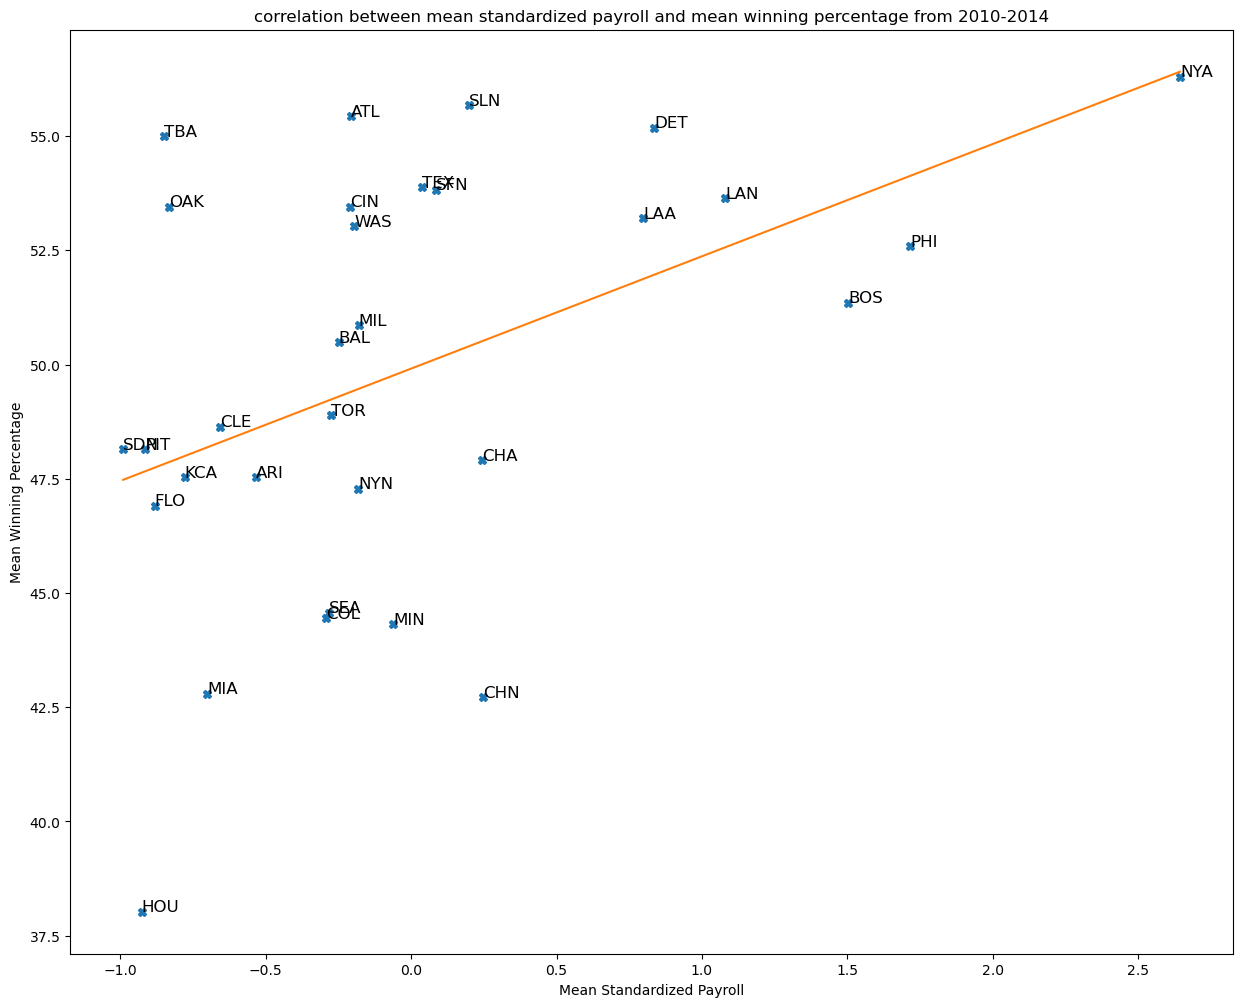

In [159]:
for i in frames:
    data = frame_table[frame_table['time_frames'] == i]
    
    #get the ave winning percentage in this time range for every team
    ave_winper = (data.groupby(['teamID']))['Win_percentage'].mean()
    ave_winper = ave_winper.to_frame()# convert to a dataframe
    #get the ave payrolls in this time range for every team
    ave_std_payroll = (data.groupby(['teamID']))['std_payroll'].mean()
    ave_std_payroll = ave_std_payroll.to_frame()

    #merge 2 dataframe
    total_ave = ave_std_payroll.merge(ave_winper, how = 'inner', left_on = ['teamID'], right_on=['teamID'])
    total_ave['teamID']= total_ave.index
    total_ave.columns=['ave_std_payrolls', 'ave_win_percentage','teamID']
    
   

 #plot 
    x_ax = total_ave['ave_std_payrolls'].values
    y_ax = total_ave['ave_win_percentage'].values
    lin_regression = np.poly1d(np.polyfit(x = x_ax, y = y_ax, deg = 1))
    horizontal = np.linspace(x_ax.min(), x_ax.max(), 100)
    vertical = lin_regression(horizontal)

    plt.figure(figsize  = (15,12))
    plt.plot(x_ax, y_ax, 'X', horizontal, vertical)
    
    #label the teams
    for j, t in enumerate(total_ave['teamID']):
        plt.annotate(t, (x_ax[j], y_ax[j]), size = 12)

    plt.title("correlation between mean standardized payroll and mean winning percentage from "+i)
    plt.xlabel("Mean Standardized Payroll")
    plt.ylabel("Mean Winning Percentage")
    plt.show()

Question 3:
The plots from problem 4 and 6 are not too different from each others. the trendings are the same, increasing payroll over the periods. The plots  from problem 6 using mean standardized payrolls for the x axis, therefore the scale for the x axis in these plots is different from the on in problem 4. It is easier for us to see the standard deviation for the payroll in plots of problem 6. 

<function matplotlib.pyplot.show(close=None, block=None)>

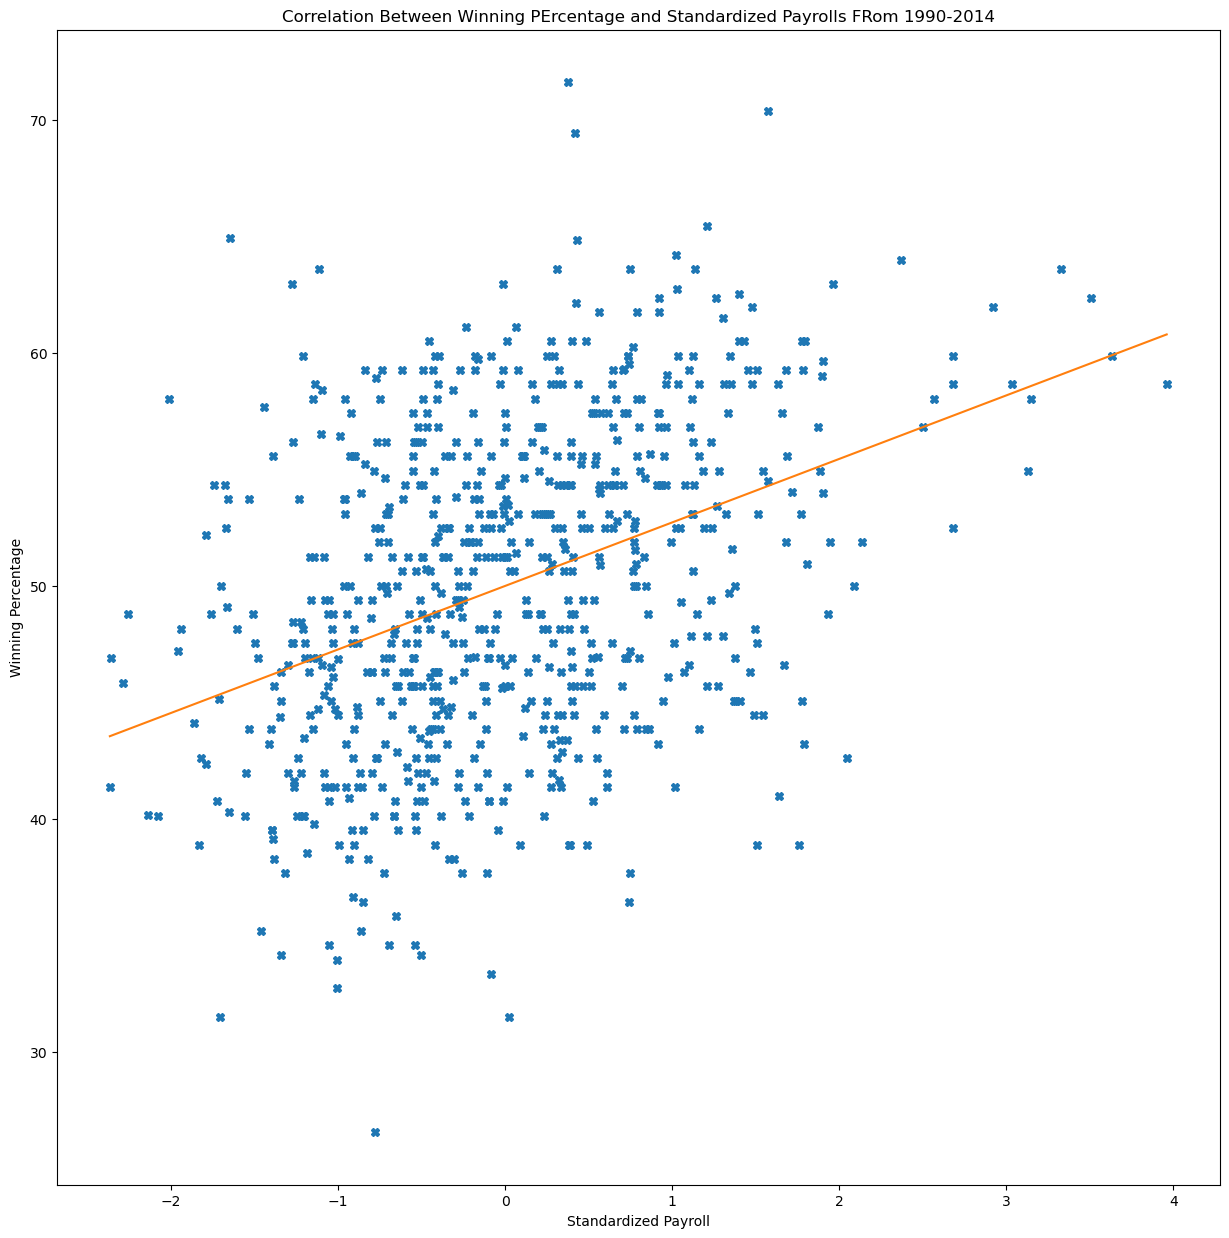

In [168]:
std_table = frame_table[['yearID','teamID','Win_percentage']].copy()
std_win_table = stand_payroll.merge(std_table, how='inner', left_on=['yearID', 'teamID'], right_on=['yearID', 'teamID'])
std_win_table

xaxis = std_win_table['std_payroll'].values
yaxis = std_win_table['Win_percentage'].values

linear_reg = np.poly1d(np.polyfit(x=xaxis, y = yaxis, deg = 1))
hor = np.linspace( xaxis.min(),xaxis.max(), 100)
ver = linear_reg(hor)

plt.figure(figsize = (15,15))
plt.plot(xaxis, yaxis,'X', hor, ver)
plt.title('Correlation Between Winning PErcentage and Standardized Payrolls FRom 1990-2014')
plt.xlabel('Standardized Payroll')
plt.ylabel('Winning Percentage')
plt.show

In [169]:
#Problem 8:
std_win_table['expected_win_pct']= std_win_table['std_payroll']*2.5+50

std_win_table['efficiency'] = std_win_table['Win_percentage'] - std_win_table['expected_win_pct']
std_win_table

,yearID,teamID,total_payroll,std_payroll,time_frames,Win_percentage,expected_win_pct,efficiency
0,1990,ATL,14555501.0,-0.667275,1990-1994,40.123457,48.331811,-8.208354
1,1990,BAL,9680084.0,-1.959861,1990-1994,47.204969,45.100348,2.104621
2,1990,BOS,20558333.0,0.924213,1990-1994,54.320988,52.310533,2.010454
3,1990,CAL,21720000.0,1.232198,1990-1994,49.382716,53.080495,-3.697779
4,1990,CHA,9491500.0,-2.009859,1990-1994,58.024691,44.975353,13.049338
...,...,...,...,...,...,...,...,...
723,2014,SLN,120693000.0,0.457126,2010-2014,55.555556,51.142816,4.412740
724,2014,TBA,72689100.0,-0.593171,2010-2014,47.530864,48.517072,-0.986208
725,2014,TEX,112255059.0,0.272509,2010-2014,41.358025,50.681273,-9.323248
726,2014,TOR,109920100.0,0.221422,2010-2014,51.234568,50.553554,0.681014


<function matplotlib.pyplot.show(close=None, block=None)>

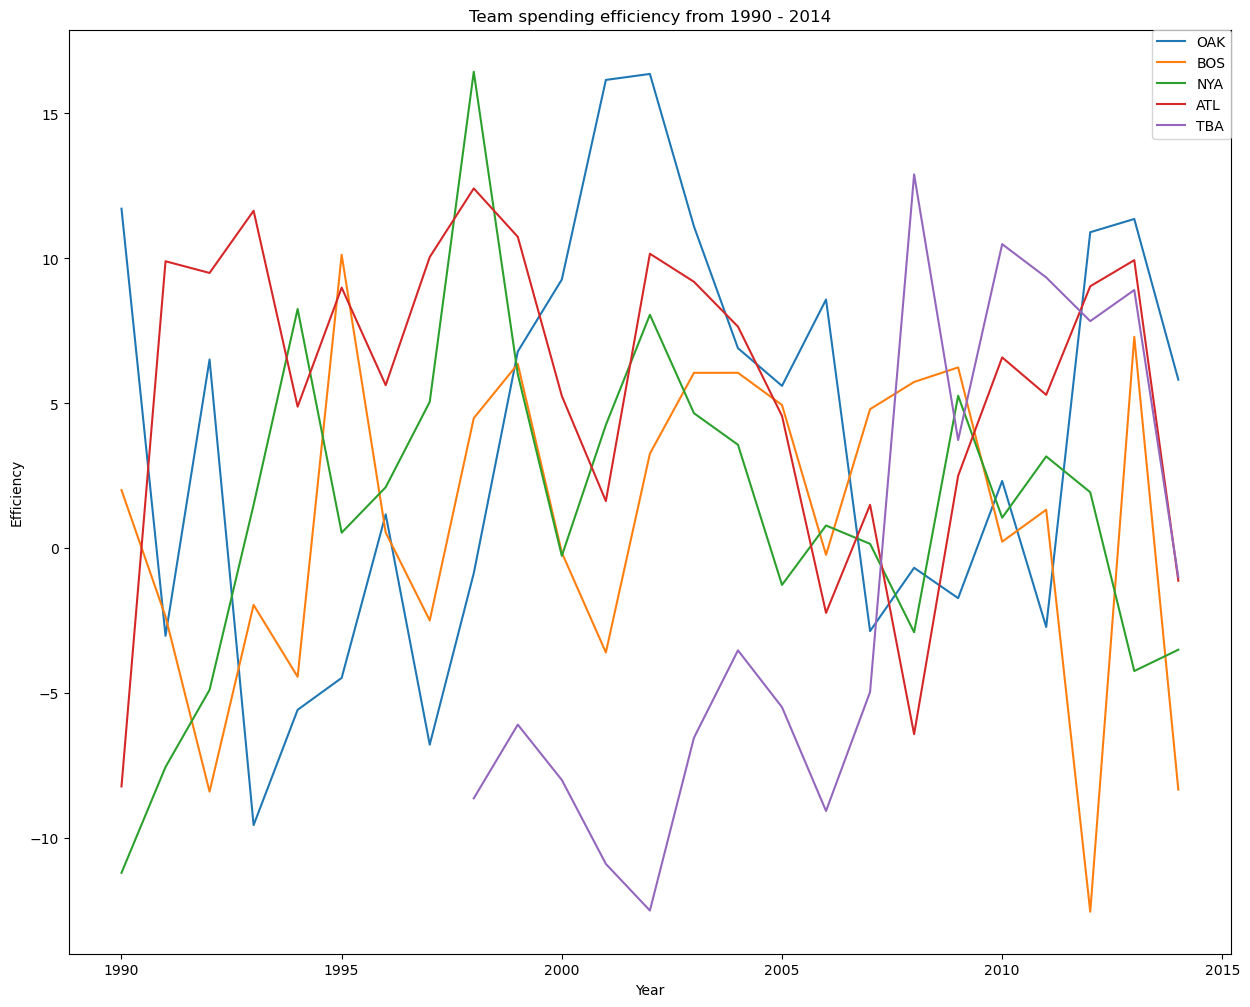

In [174]:
#plot
plot_teams = ['OAK', 'BOS', 'NYA', 'ATL', 'TBA']

plt.figure(figsize=(15,12))
plt.title('Team spending efficiency from 1990 - 2014')
plt.xlabel('Year')
plt.ylabel('Efficiency')

for t in plot_teams:
    data = std_win_table[std_win_table['teamID'] == t]
    plt.plot(data['yearID'], data['efficiency'].fillna(value=0), label = t)
    plt.legend(bbox_to_anchor = (1,1), loc = 0, borderaxespad = 0)

plt.show

Question 4:
This plot helps we see the effieciency of each team more accurate by each year compares to the other plots. During the Moneyball period, OAK actually had a very high paying efficiency but it plunged during the 2005-2010 and gained back after 2010. 